<a href="https://colab.research.google.com/github/Roshni-Bala/Crop-Disease-Detection-NIC_AP/blob/main/plant_diseases_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install PyDrive

In [ ]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
download = drive.CreateFile({'id': '1LehLXl5Wg_1Mtp78EmbkDxjoHf6s6nWx'})
download.GetContentFile('plant_disease_dataset.zip')

Unzipping Data folder to content folder called 'dataset'

In [ ]:
!unzip -u "/content/plant_disease_dataset.zip" -d "/content/dataset"

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: /content/dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: /content/dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: /content/dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: /content/dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2

establishing directory paths for train, valid and test

In [ ]:
training_dir = '/content/dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
valid_dir = '/content/dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

importing necessary libraries and modules


In [ ]:
import os
#import cv2 as cv
#import glob as gb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

listing all classes to which images belong to

In [ ]:
os.listdir("/content/dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train")

['Apple___Apple_scab',
 'Cherry_(including_sour)___healthy',
 'Blueberry___healthy',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Pepper,_bell___Bacterial_spot',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Tomato___Septoria_leaf_spot',
 'Tomato___healthy',
 'Apple___Black_rot',
 'Tomato___Target_Spot',
 'Pepper,_bell___healthy',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Potato___Late_blight',
 'Cherry_(including_sour)___Powdery_mildew',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Grape___Black_rot',
 'Tomato___Leaf_Mold',
 'Tomato___Early_blight',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___healthy',
 'Apple___Cedar_apple_rust',
 'Strawberry___healthy',
 'Tomato___Late_blight',
 'Tomato___Bacterial_spot',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Peach___Bacterial_spot',
 'Apple___healthy',
 'Potato___healthy',
 'Potato___Early_blight',
 'Raspberry___healthy',
 'Strawberry___Leaf_scorch',
 'Corn_(maiz

Data preprocessing using built in function called preprocessing_input


In [ ]:
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

train_dg = ImageDataGenerator(zoom_range = 0.5, shear_range = 0.3, horizontal_flip = True, preprocessing_function = preprocess_input)
val_dg = ImageDataGenerator(preprocessing_function = preprocess_input)

train = train_dg.flow_from_directory(directory = training_dir, target_size = (256,256), batch_size = 32)
valid = val_dg.flow_from_directory(directory = valid_dir, target_size = (256,256), batch_size = 32)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
X_test, label = train.next()
X_test.shape

(32, 256, 256, 3)

visualizing data post preprocessing

In [ ]:
def plotImage(img_arr, label):
  for im, l in zip(img_arr, label):
    plt.figure(figsize = (2,2))
    plt.imshow(im)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


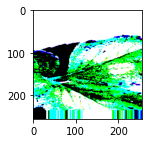

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


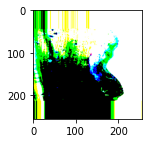

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


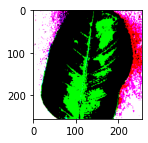

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


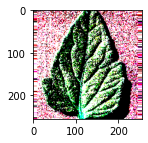

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


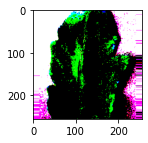

In [ ]:
plotImage(X_test[:5], label[:5])

In [ ]:
from keras.layers import Dense, Flatten
from keras.models import Model
import keras

creating a base model

In [ ]:
base_mdl = VGG19(input_shape = (256,256,3), include_top = False)
for layer in base_mdl.layers:
  layer.trainable = False

In [ ]:
base_mdl.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

model creation

In [ ]:
X = Flatten()(base_mdl.output)
X = Dense(units = 38, activation = 'softmax')(X)

model = Model(base_mdl.input, X)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

compile model

In [ ]:
model.compile(optimizer='adam', loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'])

early stopping and model check point

early stopping - monitor validation accuracy

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

earlystop = EarlyStopping(monitor = 'val_accuracy', min_delta = 0.01, patience = 3, verbose = 1)

modelcheckpt = ModelCheckpoint(filepath = 'plant_best_model.h5', monitor = 'val_accuracy', min_delta = 0.01, patience = 3, verbose = 1, save_best_only = True)

callback = [earlystop, modelcheckpt]

In [ ]:
history = model.fit_generator(train, steps_per_epoch = 16, epochs = 50, verbose = 1, callbacks = callback, validation_data=valid, validation_steps = 16)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 30.0201 - accuracy: 0.1914
Epoch 1: val_accuracy improved from -inf to 0.38477, saving model to plant_best_model.h5
16/16 [==============================] - 28s 828ms/step - loss: 30.0201 - accuracy: 0.1914 - val_loss: 18.8882 - val_accuracy: 0.3848
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 16.2166 - accuracy: 0.4082
Epoch 2: val_accuracy improved from 0.38477 to 0.59766, saving model to plant_best_model.h5
16/16 [==============================] - 13s 818ms/step - loss: 16.2166 - accuracy: 0.4082 - val_loss: 8.9083 - val_accuracy: 0.5977
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 11.2216 - accuracy: 0.5566
Epoch 3: val_accuracy improved from 0.59766 to 0.66797, saving model to plant_best_model.h5
16/16 [==============================] - 13s 823ms/step - loss: 11.2216 - accuracy: 0.5566 - val_loss: 7.7677 - val_accuracy: 0.6680
Epoch 4/50
16/16 [========================

In [ ]:
import pickle
with open('pkl_mdl', 'wb') as file1:
  pickle.dump(model, file1)

INFO:tensorflow:Assets written to: ram://ab84688b-7b2f-4c0b-aa31-e5c9115c545e/assets


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


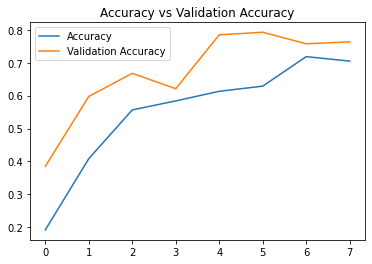

In [ ]:
h = history.history
print(h.keys())

plt.plot(h['accuracy'], label = 'Accuracy')
plt.plot(h['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy vs Validation Accuracy')
plt.legend()
plt.show()

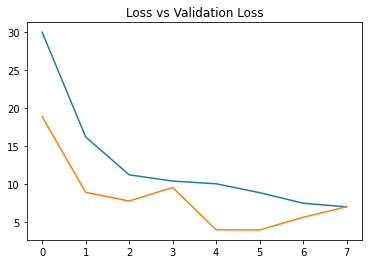

In [ ]:
plt.plot(h['loss'], label = "Loss")
plt.plot(h['val_loss'], label = "Validation Loss")
plt.title('Loss vs Validation Loss')
plt.show()

In [ ]:
from keras.models import load_model
model = load_model("/content/plant_best_model.h5")


In [ ]:
# accuracy = model.evaluate_generator(valid)[1]
# print(f"Accuracy of best model: {accuracy*100}%")

In [ ]:
classDictionary = dict(zip(list(train.class_indices.values()), list(train.class_indices.keys())))
classDictionary

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [ ]:
import pandas as pd
import numpy as np
df_dict = pd.DataFrame()
df_dict['Class_ID'] = classDictionary.keys()
df_dict['Class_Name'] = train.class_indices
df_dict.to_csv("dictionary_plants.csv")

In [ ]:
import matplotlib.pyplot as plt
import keras
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions
def predfunc(path):
  img = load_img(path, target_size=(256,256))
  print(plt.imshow(img))
  i = img_to_array(img)
  im = preprocess_input(i)
  img = np.expand_dims(im, axis=0)
  #print(img.shape)
  pred = np.argmax(model.predict(img))
  print("Image given as input: ", path)
  
  print("Predicted class of leaf: ", classDictionary[pred], "\n")

  

AxesImage(54,36;334.8x217.44)
Image given as input:  /content/dataset/test/test/AppleCedarRust1.JPG
Predicted class of leaf:  Apple___Cedar_apple_rust 



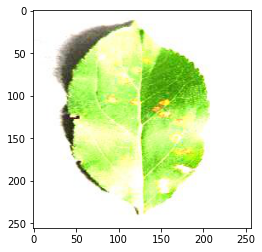

In [ ]:
predfunc('/content/dataset/test/test/AppleCedarRust1.JPG')

AxesImage(54,36;334.8x217.44)
Image given as input:  /content/dataset/test/test/CornCommonRust3.JPG
Corn_(maize)___Common_rust_ 



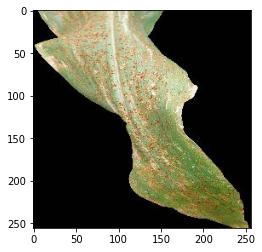

In [ ]:
predfunc("/content/dataset/test/test/CornCommonRust3.JPG")


AxesImage(54,36;334.8x217.44)
Image given as input:  /content/dataset/test/test/PotatoEarlyBlight5.JPG
Potato___Early_blight 



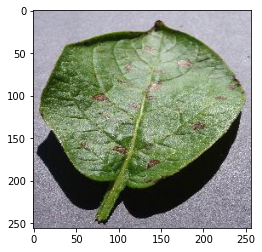

In [ ]:
predfunc("/content/dataset/test/test/PotatoEarlyBlight5.JPG")


AxesImage(54,36;334.8x217.44)
Image given as input:  /content/dataset/test/test/TomatoEarlyBlight6.JPG
Tomato___Early_blight 



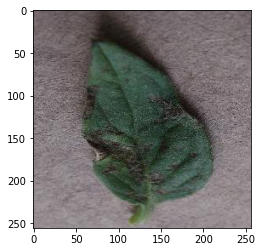

In [ ]:
predfunc("/content/dataset/test/test/TomatoEarlyBlight6.JPG")


AxesImage(54,36;334.8x217.44)
Image given as input:  /content/dataset/test/test/AppleScab2.JPG
Apple___Apple_scab 



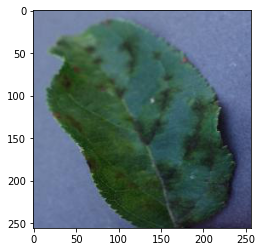

In [ ]:
predfunc("/content/dataset/test/test/AppleScab2.JPG")


AxesImage(54,36;334.8x217.44)
Image given as input:  /content/dataset/test/test/TomatoYellowCurlVirus1.JPG
Tomato___Tomato_Yellow_Leaf_Curl_Virus 



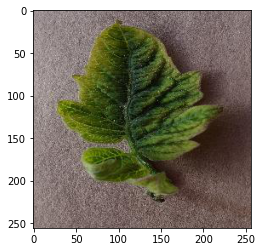

In [ ]:
predfunc("/content/dataset/test/test/TomatoYellowCurlVirus1.JPG")

Enter the path of the file you would like to predict the disease for :/content/1e1ee82b-592b-4158-a48b-347084647492___NREC_B.Spot 9046.JPG
AxesImage(54,36;334.8x217.44)
Image given as input:  /content/1e1ee82b-592b-4158-a48b-347084647492___NREC_B.Spot 9046.JPG
Predicted class of leaf:  Pepper,_bell___Bacterial_spot 



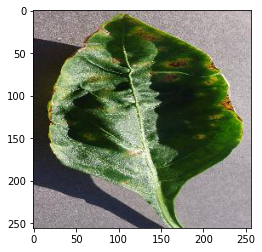

In [ ]:
from PIL import Image
path = input("Enter the path of the file you would like to predict the disease for :")
predfunc(path)

Demo Test

AxesImage(54,36;334.8x217.44)
Image given as input:  /content/badcf57e-def1-4211-b267-94b4008a5fa0___RS_HL 5087.JPG
Predicted class of leaf:  Pepper,_bell___healthy 



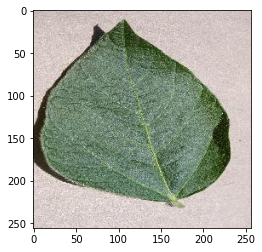

In [ ]:
predfunc("/content/badcf57e-def1-4211-b267-94b4008a5fa0___RS_HL 5087.JPG")

AxesImage(54,36;334.8x217.44)
Image given as input:  /content/a0aabeb9-a3b2-4e85-bf3f-9d9892d4c895___RS_HL 4375.JPG
Predicted class of leaf:  Apple___healthy 



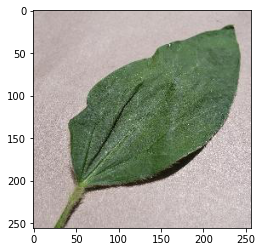

In [ ]:
predfunc("/content/a0aabeb9-a3b2-4e85-bf3f-9d9892d4c895___RS_HL 4375.JPG")

In [ ]:
classDictionary = {0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: 'Tomato___Late_blight',
 31: 'Tomato___Leaf_Mold',
 32: 'Tomato___Septoria_leaf_spot',
 33: 'Tomato___Spider_mites Two-spotted_spider_mite',
 34: 'Tomato___Target_Spot',
 35: 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 36: 'Tomato___Tomato_mosaic_virus',
 37: 'Tomato___healthy'}